# Екатерина Борискова 
## Проект по теме науки о данных , исследования датасета : framingham.csv
 В данном датасете мы будем предсказывать различные параметры по другим числовым характеристикам. 
У нас есть различные параметры: 
* Sex (male - 1 , female - 2)
* Age
* Current Smoker
* Cigs Per Day
* BP Meds
* Prevalent Stroke
* Prevalent Hyp
* Diabetes
* Tot Chol
* Sys BP
* Dia BP
* BMI
* Heart Rate
* 10 year risk of coronary heart disease CHD 

# Загрузим наш датасет и подключим необходимые библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
%matplotlib inline

In [ ]:
df = pd.read_csv('framingham.csv')
df.fillna(0, inplace= True)

#Посмотрим на некоторыe статистические тенденции :

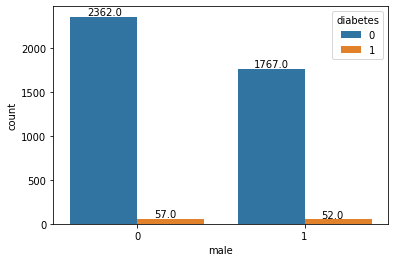

In [119]:
ax = sns.countplot(x = "male", data = df, hue = "diabetes")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 15))

Исходя из построенных нами гистограмм ,можно сделать вывод о том,что мужчины страдают диабетом чаще чем женщины.


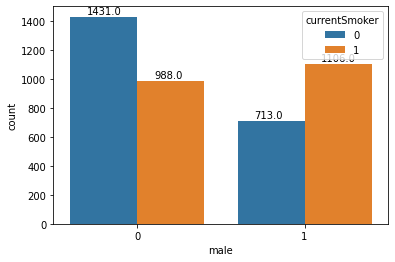

In [120]:
ax = sns.countplot(x = "male", data = df, hue = "currentSmoker")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 15))

Как видим ,мужчины курят чаще, это и неудивительно и неоднократно подтверждалось мировой статистикой.

# Корреляционная карта

Как видем по этому графику вида heatmap , у наших параметров есть некторые прямые зависимости, например currentSmoker от cigsPerDay,так и обратные,например сустальное давление и currentSmoker,что в прицнипе и не удивительно,ведь мы знаем,что никотин оказывает определенное воздействие на давление крови у человека.


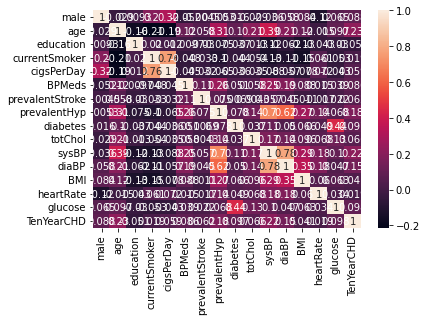

In [ ]:
sns.heatmap(df.corr(),annot= True)

# Линейная и Логистическая регрессиия

 Мы будем предсказывать есть ли у человека диабет или нету ,для этого мы создадим и обучим необходимую математичекую модель.

In [ ]:
target = ['diabetes']
features = [item for item in df.columns if item not in target][4:]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df[features], df[target], test_size = 0.2, random_state=42,
                                                      shuffle = True)


In [ ]:
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(3390, 11) (848, 11)
(3390, 1) (848, 1)


In [ ]:
LogModel = LogisticRegression(solver='lbfgs', max_iter=1000)

Выше мы создаем логистическую модель для решения задач на регрессию

In [ ]:
LogModel.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [ ]:
LogModel.score(X_train, y_train)

0.9864306784660767

In [ ]:
X = df[[features[-2], target[0]]]
X["range"] = np.arange(len(X))

In [ ]:
sns.FacetGrid(X, hue="diabetes", size=5) \
   .map(plt.scatter,'range', "glucose") \
   .add_legend()
plt.show()



In [ ]:
print(f'Score Logistic Regression : {LogModel.score(X_train, y_train)}')

Score Logistic Regression : 0.9864306784660767


In [ ]:
features_importance = pd.DataFrame({'Coef' : LogModel.coef_[0],
                    'Names' : features})

In [ ]:
features_importance

,Coef,Names
0,-0.006584,cigsPerDay
1,0.121588,BPMeds
2,-0.694364,prevalentStroke
3,0.586655,prevalentHyp
4,-0.001117,totChol
5,0.014841,sysBP
6,-0.024504,diaBP
7,0.043961,BMI
8,0.005073,heartRate
9,0.073047,glucose


Весовые коэфиценты, их наличие или отсутвие будет влиять на выбор модели в сторону наличие диабета или его отсутсвия в этой задаче

In [ ]:
print(f'Bias : {LogModel.intercept_}')

Bias : [-12.13282579]


## Метрики

В данном пункте мы будем смотреть метрики обученной нами раннее модели.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,\
recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

LogisticPredict = LogModel.predict(X_valid)

In [ ]:
print('Accuracy :', accuracy_score(y_valid, LogisticPredict))
print('Recall  : ', recall_score(y_valid, LogisticPredict))
print('F1_score: ', f1_score(y_valid, LogisticPredict))

Accuracy : 0.9846698113207547
Recall  :  0.5
F1_score:  0.6486486486486487


Как видно выше,метрики достаточно неплохие и дают нам возможность пользоваться данной моделью в будущем для предсказывания диабетов уже на другом датасете

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


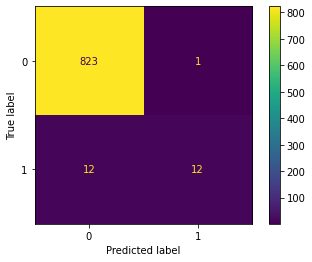

In [ ]:
plot_confusion_matrix(LogModel, X_valid, y_valid)

Как видим ,полученная модель имеет очень неплохой результат,судя по левому верхнему квадранту

## Линейная регрессия

В данном пункте мы попытаемся обучить модель определять один вид давления по другому и постараемся получить для модели достаточно хороший скор.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


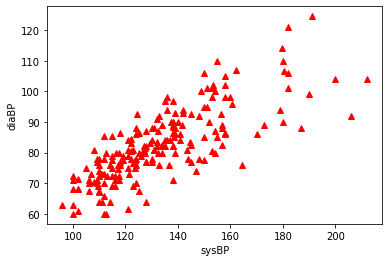

In [ ]:
a = list(df['diaBP'][0:200])
b = list(df['sysBP'][0:200])
plt.plot(b,a,"r^")
plt.xlabel('sysBP')
plt.ylabel('diaBP')
plt.show()

Как видно на графике выше, эти параметры (давления) имеют достаточно неплохую линейную зависимость с которой можно работать

In [ ]:
X = df['sysBP'].values
y = df['diaBP'].values
X=X.reshape(-1,1)
y = y.reshape(-1,1)

LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_) #Оптимальные значения 

[26.81220913] [[0.42372675]]


In [ ]:
print(LinReg.score(X,y))

0.6146592793697766


Итого мы получили модель которая можешь предсказывать один вид кровянного давления по другому с каким то score

# T статистика и выдвижение гипотез:

В данном пунке мы посмотрим как работают т-тесты и какие гипотезы по ним можно выдвигать или опровергать

Например ,выдвенем гипотезу о том ,что каждый человек нашего датасета в среднем выкуривает 8 сигарет в день по нашей выборке из 200 человек.

In [ ]:
Smokers = list(df['cigsPerDay'][0:200])
stats.ttest_1samp(a=Smokers, popmean = 8)

Ttest_1sampResult(statistic=1.3671772338060624, pvalue=0.17311208536871697)

Здесь мы видим, что p-значение больше 0,05, следовательно, мы примем нулевую гипотезу и отвергнем альтернативную гипотезу.